In [1]:
# !pip install gym

  Using cached https://files.pythonhosted.org/packages/70/ca/20aee170afe6011e295e34b27ad7d7ccd795faba581dd3c6f7cec237f561/pyglet-1.5.0-py2.py3-none-any.whl
  Created wheel for gym: filename=gym-0.17.2-cp37-none-any.whl size=1650898 sha256=dc2cb86af8476fa11f1930e957cd9d7abca01a04285fa3dcaa42343f540444b2
  Stored in directory: C:\Users\vikash\AppData\Local\pip\Cache\wheels\87\e0\91\f56e44e8062f8cd549673da49f59e1d4fe8b17398119b1d221
Successfully built gym


In [2]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [3]:
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(400, 300))
# display.start()
env_name = "CartPole-v1"
env = gym.make(env_name)
print(env.observation_space)
print(env.action_space)

Box(4,)
Discrete(2)


In [4]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [15]:
class AgentVikash():
    def __init__(self,env):
        self.env_actions_size = env.action_space.n
    def get_action(self, state):
        pole_angle = state[2]
        #action = random.choice(range(self.env_actions_size))
        action = 0 if pole_angle < 0 else 1
        return action
        

Episode finished after 58 timesteps total_reward 58.0


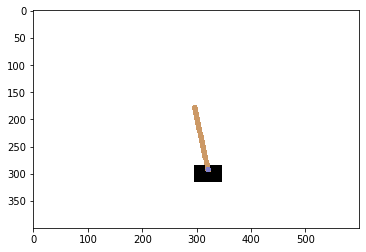

In [17]:
ag = AgentVikash(env)
state = env.reset()
# env.monitor.start('cartpole-experiment-1', force=True)
total_reward = 0
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for s in range(2000):
    #action = env.action_space.sample()
    action = ag.get_action(state)
    state, reward, done, info = env.step(action)
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    total_reward += reward
    #show_state(env,s)
    if done:
        print("Episode finished after {} timesteps total_reward {}".format(s+1, total_reward))
        break
# env.monitor.close()

env.close()